# Распознавание собак и кошек на изображениях с помощью предварительно обученной нейронной сети VGG16

**Источник данных** - соревнования Kaggle [Dogs vs. Cats](https://www.kaggle.com/c/dogs-vs-cats/data).

Для распознавания используется предварительно обученная сверточная нейронная сеть VGG16.

Перед использованием необходимо скачать и подготовить данные для обучения, проверки и тестирования. Можно использовать пример в ноутбуке data_preparation

In [ ]:

!pip install PyTelegramBotAPI
import telebot
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import preprocess_input

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 157 kB 13.0 MB/s 
  Created wheel for PyTelegramBotAPI: filename=pyTelegramBotAPI-4.5.1-py3-none-any.whl size=138116 sha256=113d4ee304fc861edf0031a001e4fa1cf0de7e2731e206ba87249cfd2b76e367
  Stored in directory: /root/.cache/pip/wheels/9a/90/69/89e4e68c819633d933753827fd4f3a22987e162b7404b092b5
Successfully built PyTelegramBotAPI


In [ ]:
# Каталог с данными для обучения
train_dir = 'train'
# Каталог с данными для проверки
val_dir = 'val'
# Каталог с данными для тестирования
test_dir = 'test'
# Размеры изображения
img_width, img_height = 150, 150
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Размер мини-выборки
batch_size = 64
# Количество изображений для обучения
nb_train_samples = 17500
# Количество изображений для проверки
nb_validation_samples = 3750
# Количество изображений для тестирования
nb_test_samples = 3750

## Загружаем предварительно обученную нейронную сеть

In [ ]:
vgg16_net = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 0s 0us/step


"Замораживаем" веса предварительно обученной нейронной сети VGG16

In [ ]:
vgg16_net.trainable = False

In [ ]:
vgg16_net.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

## Создаем составную нейронную сеть на основе VGG16

In [ ]:
model = Sequential()
# Добавляем в модель сеть VGG16 вместо слоя
model.add(vgg16_net)
# Возвращает копию массива сжатую до одного измерения
model.add(Flatten())
# 2D-слой
model.add(Dense(256))
# Функция активации
model.add(Activation('relu'))
# Функция, предотвращающая переобучение
model.add(Dropout(0.5))
# 2D-слой
model.add(Dense(1))
# Функция активации
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
 activation_1 (Activation)   (None, 1)                 0

Компилируем составную нейронную сеть

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Загружем файл с данными для обучения


In [ ]:
import gdown
!gdown https://drive.google.com/uc?id=1GM3EFy1X3xTfNb0xB7-qZi63tJbe_d-1
!unzip dogs-vs-cats-train.zip
!mv train sad

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/d

In [ ]:
import shutil
import os
# Каталог с набором данных
data_dir = 'sad'
# Каталог с данными для обучения
train_dir = 'train'
# Каталог с данными для проверки
val_dir = 'val'
# Каталог с данными для тестирования
test_dir = 'test'
# Часть набора данных для тестирования
test_data_portion = 0.15
# Часть набора данных для проверки
val_data_portion = 0.15
# Количество элементов данных в одном классе
nb_images = 12500
def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name)
    os.makedirs(os.path.join(dir_name, "cats"))
    os.makedirs(os.path.join(dir_name, "dogs"))
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)
def copy_images(start_index, end_index, source_dir, dest_dir):
    for i in range(start_index, end_index):
        shutil.copy2(os.path.join(source_dir, "cat." + str(i) + ".jpg"),
                    os.path.join(dest_dir, "cats"))
        shutil.copy2(os.path.join(source_dir, "dog." + str(i) + ".jpg"),
                   os.path.join(dest_dir, "dogs"))
start_val_data_idx = int(nb_images * (1 - val_data_portion - test_data_portion))
start_test_data_idx = int(nb_images * (1 - test_data_portion))
print(start_val_data_idx)
print(start_test_data_idx)
copy_images(0, start_val_data_idx, data_dir, train_dir)
copy_images(start_val_data_idx, start_test_data_idx, data_dir, val_dir)
copy_images(start_test_data_idx, nb_images, data_dir, test_dir)

8750
10625


## Создаем генератор изображений

Генератор изображений создается на основе класса ImageDataGenerator. Генератор делит значения всех пикселов изображения на 255.

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)


Генератор данных для обучения на основе изображений из каталога

In [ ]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=( img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 17500 images belonging to 2 classes.


Генератор данных для проверки на основе изображений из каталога

In [ ]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 3750 images belonging to 2 classes.


Генератор данных для тестирования на основе изображений из каталога

In [ ]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3750 images belonging to 2 classes.


## Обучаем модель с использованием генераторов

train_generator - генератор данных для обучения

validation_data - генератор данных для проверки

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=1,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


273/273 [==============================] - 73s 267ms/step - loss: 0.5100 - accuracy: 0.7427 - val_loss: 0.3578 - val_accuracy: 0.8570


## Оцениваем качество работы сети с помощью генератора

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))

Аккуратность на тестовых данных: 85.13%


# Тонкая настройка сети (fine tuning)

"Размораживаем" последний сверточный блок сети VGG16

In [ ]:
vgg16_net.trainable = True
trainable = False
for layer in vgg16_net.layers:
    if layer.name == 'block5_conv1':
        trainable = True
    layer.trainable = trainable

In [ ]:
# Проверяем количество обучаемых параметров
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
 activation_1 (Activation)   (None, 1)                 0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=2,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/2
273/273 [==============================] - 77s 275ms/step - loss: 0.2408 - accuracy: 0.8981 - val_loss: 0.1839 - val_accuracy: 0.9235
Epoch 2/2
273/273 [==============================] - 74s 270ms/step - loss: 0.1519 - accuracy: 0.9380 - val_loss: 0.1528 - val_accuracy: 0.9383


In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Аккуратность на тестовых данных: 93.72%


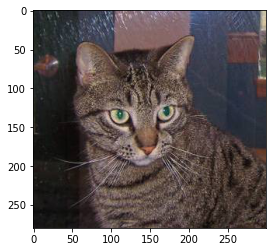

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('train/cats/cat.1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = preprocess_input(x)

features = model.predict(x)

FileNotFoundError: ignored

подргужаем тг бот



In [ ]:
def func(img_path):
 img = image.load_img(img_path, target_size=(img_width, img_height))
 x = image.img_to_array(img)
 x = np.expand_dims(x, axis=0)
 x = preprocess_input(x)
 features = model.predict(x)
 if features[0][0] >= 0.5:
   return 1
 else:
   return 0

In [ ]:

global flag
flag = -1
from telebot import types

token = "5160765969:AAFVuRuuqUg30fW_2uG_Qs9ORDI31hIEllQ"
bot = telebot.TeleBot(token)

@bot.message_handler(commands=['start'])
def start_message(message):
    bot.send_message(message.chat.id, "Привет! Отправьте фото!")
    global flag
    flag = 1

@bot.message_handler(content_types=['photo'])
def photo(message):
        global temp
        global flag
        fileid = message.photo[-1].file_id
        print('fileID =', fileid)
        file_info = bot.get_file(fileid)
        print('file.file_path =', file_info.file_path)
        if flag > 0:
             downloaded_file = bot.download_file(file_info.file_path)
             with open("image.jpg", 'wb') as new_file:new_file.write(downloaded_file)
             if func('image.jpg'):
                   temp = "Это не кошка!"
             else:
                   temp = "Это кошка!"

             bot.send_message(message.chat.id, temp)
             bot.send_message(message.chat.id, "Жду очередное фото!")
@bot.message_handler(commands=['end'])
def start_message(message):
  global flag
  flag = -1
  bot.send_message(message.chat.id, "До скорых встреч!")

bot.infinity_polling()